This workbook is designed to walkthrough usage of ImageSegmenter (2023.02.01) for doing thresholding and getting results out.

This implementationm uses novel bright-dark edge detection schemes and pixel-based classifier.

In [1]:
import sys
sys.path.append("..")
from Utility.segmentation_utils import *
import matplotlib.pyplot as plt

In [2]:
# Use this cell to define image of interest
# Two Image Segmenters are made, one default and the other with modificaitons
# Use these in tandem to ocmpare and contrast! 
img_path = "../Images/Training/39.5 hold 1.bmp"
img_path = "../Images/Additional/Images for model (from Alexa)/3.tif" 



IS_default = ImageSegmenter(img_path,top_boundary=0,bottom_boundary=1800,override_exists=True,
                            file_str = "default"
                   )

IS_mod = ImageSegmenter(img_path,top_boundary=0,bottom_boundary=1800,override_exists=True, 
                    threshold_mode="pixel", # This uses the pixel base classifier, can set to "otsu"
                    edge_modification="dark_bright",
                    file_str = "modded" # Use this to define the saved ID extension
                   )

Image Segmenter on 3 created!
dark_bright
(3, 3)
Image Segmenter on 3 created!


In [3]:
IS_default.create_csv()
IS_mod.create_csv()

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


[  0 100 101 102 103 104 105 106 107 108 109 110]
[ -1 100 101 102 103 104 105 106 107 108 109 110]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


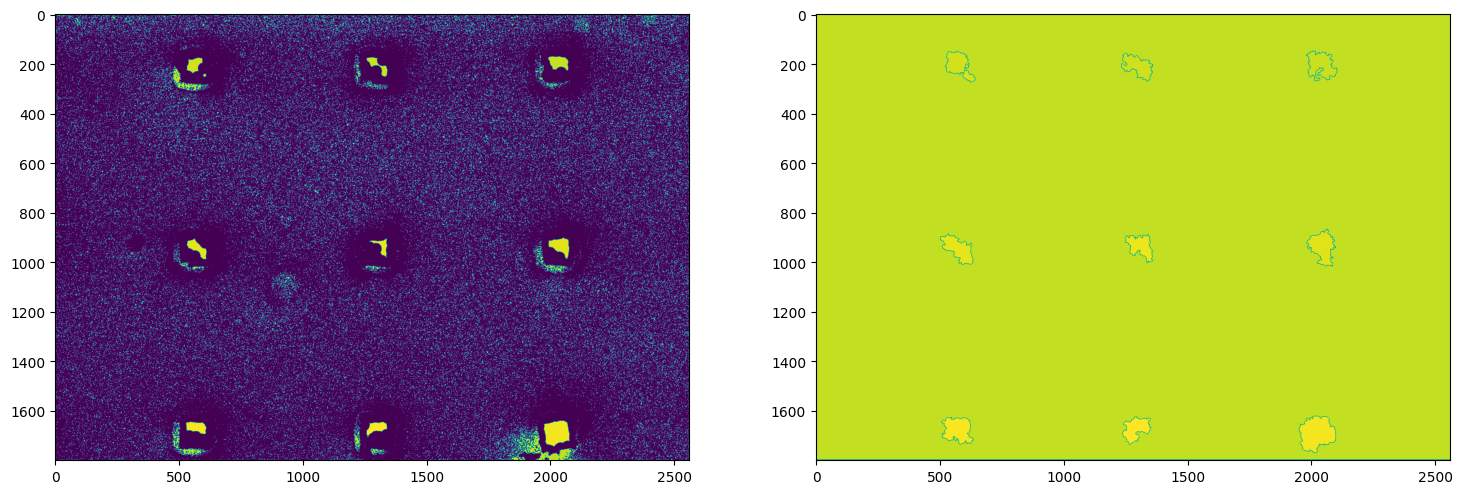

In [8]:
# Define which two images to look at side by side. Possible interests are:
# {markers,markers2,thresh,_dist_transform,_edge_highlight,_dark_edges,_original_thresh}
# Some of these are only created in modified version, so be wary!

im1 = IS_default.markers#cv2.subtract(IS_default._bg_mark,IS_default._fg_mark)
im2 = IS_default.markers2#cv2.subtract(IS_mod._bg_mark,IS_mod._fg_mark)

fig, ax = plt.subplots(1,2,figsize=(18,20))
ax[0].imshow(im1)
ax[1].imshow(im2)
print(np.unique(im1))
print(np.unique(im2))

print(IS_default.regions_list)


Default regions: 12
Mod regions: 16


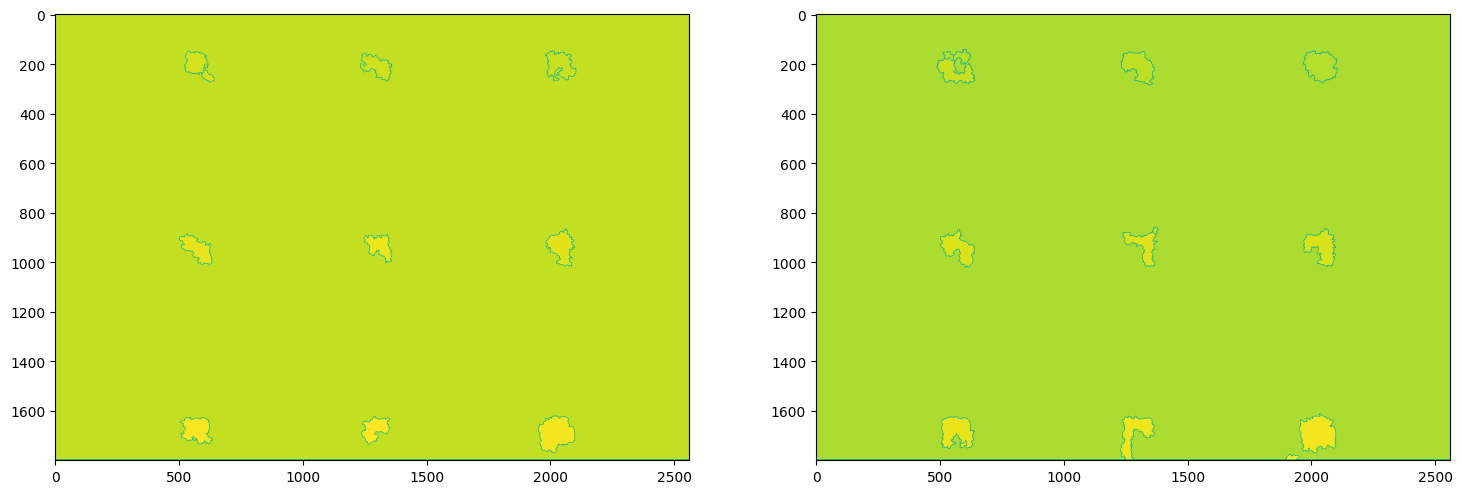

In [5]:
# Note: I believe this count is different than hte actually labeled regions 
# since things that are too small are automatically discounted

fig, ax = plt.subplots(1,2,figsize=(18,20))
ax[0].imshow(IS_default.markers2)
ax[1].imshow(IS_mod.markers2)
print(f"Default regions: {len(np.unique(IS_default.markers2))}")
print(f"Mod regions: {len(np.unique(IS_mod.markers2))}")